# Sujet 2 : le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle

## Libraries

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

## Definition des paths et chargement des données

In [146]:
path_data_url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv"

data = pd.read_csv(path_data_url)

data.rename(columns={'Unnamed: 0':'Ind'}, inplace=True)
data.head()


Ind  Year  Wheat  Wages
0    1  1565   41.0   5.00
1    2  1570   45.0   5.05
2    3  1575   42.0   5.08
3    4  1580   49.0   5.12
4    5  1585   41.5   5.15

## 1: Reproduction de la figure de Playfair

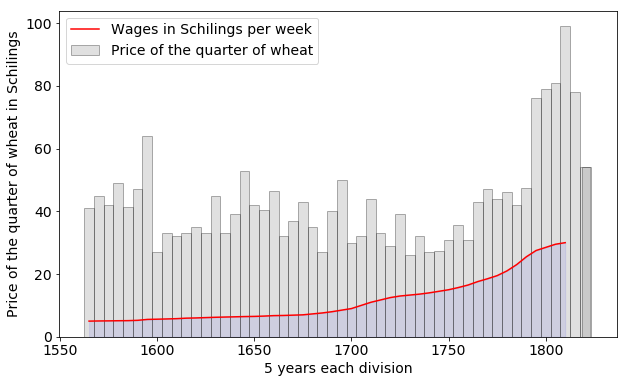

In [147]:

figure(num=None, figsize=(10, 6))
plt.rcParams.update({'font.size': 14})

# Salaire
plt.plot(data.Year, data.Wages, color="r", label='Wages in Schilings per week')
plt.fill_between(data.Year, 0, data.Wages, color="b", alpha=0.1)

# Prix du blé
plt.bar(data.Year, data.Wheat, width=5, edgecolor="k", facecolor=[0.6, 0.6, 0.6], alpha=0.3, label='Price of the quarter of wheat')

plt.legend(loc='upper left')
plt.xlabel('5 years each division')
plt.ylabel('Price of the quarter of wheat in Schilings')
plt.tight_layout
plt.show()


## 2: Amélioration de la visualisation des unités
2 axes crées correspondant aux salaires (Schilings/semaines) et l'autre aux prix du blé (Schillings/quart de boiseau)

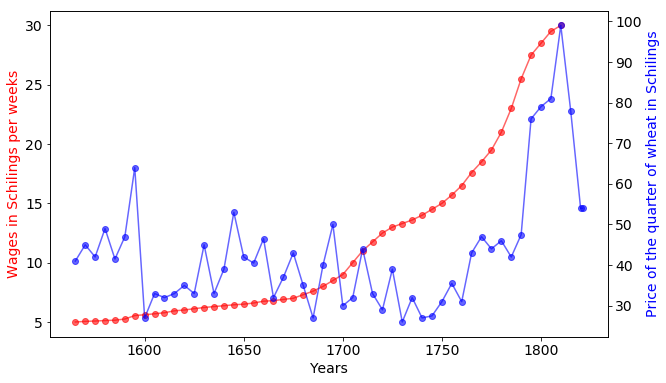

In [148]:

figure(num=None, figsize=(10, 6))
plt.rcParams.update({'font.size': 14})
ax1 = plt.subplot(111)

# Salaire

ax1.plot(data.Year, data.Wages, color="r", marker="o", alpha=0.6, label='Wages')
#ax1.fill_between(data.Year, 0, data.Wages, color="b", alpha=0.1)
plt.ylabel('Wages in Schilings per weeks', color="r")
plt.xlabel('Years')

# Prix du blé
ax2 = ax1.twinx()
plt.plot(data.Year, data.Wheat, marker="o", color="b", alpha=0.6, label='Wheat price')
plt.ylabel('Price of the quarter of wheat in Schilings', color="b")

plt.tight_layout
plt.show()




## 3: Graphique du pouvoir d'achat

### Quelques calculs d'abord

In [158]:


# Pouvoir d'achat par semaine
data['purPower_w'] = data["Wages"].divide(data["Wheat"]) # En quart de Boiseau / semaine

# Il est sans doute plus clair de le calculer par année
data['Wages_y'] = data["Wages"]/7*365 # Schillings / année
data['purPower_y'] = data["Wages_y"].divide(data["Wheat"]) # quart de Boiseau / année

# Passont en unités SI
data['Wheat_kg'] = data["Wheat"]/6.8 # Schillings / kg
data['purPower_ySI'] = data["Wages_y"].divide(data["Wheat_kg"]) # kg / année



### Et puis on trace tous ça


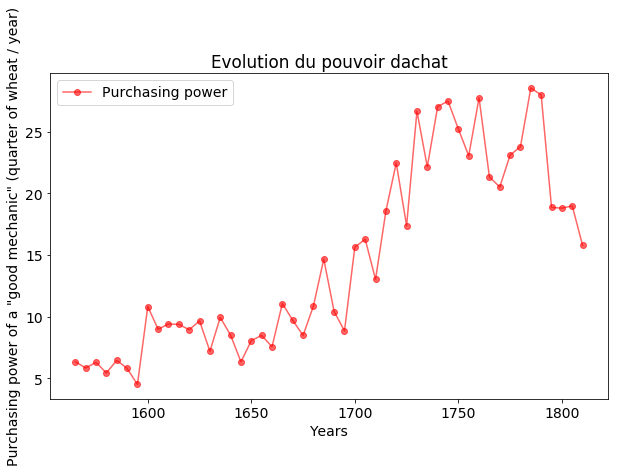

In [159]:
figure(num=None, figsize=(10, 6))
plt.rcParams.update({'font.size': 14})

# Pouvoir d'achat par année
plt.plot(data.Year, data.purPower_y, color="r", marker="o", alpha=0.6, label='Purchasing power')

plt.title('Evolution du pouvoir d''achat')
plt.legend(loc='upper left')
plt.xlabel('Years')
plt.ylabel('Purchasing power of a "good mechanic" (quarter of wheat / year)')
plt.tight_layout
plt.show()



En unité SI

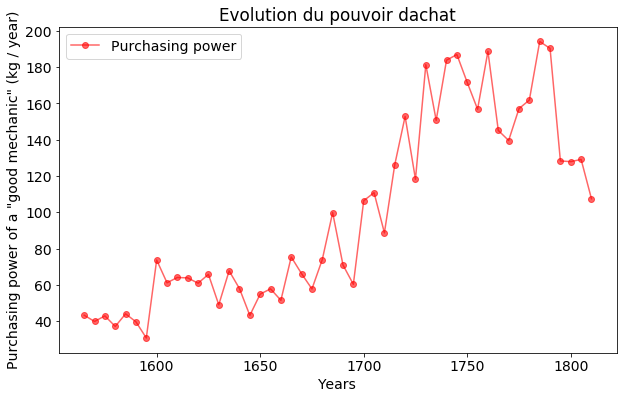

In [161]:
figure(num=None, figsize=(10, 6))
plt.rcParams.update({'font.size': 14})

# Pouvoir d'achat par année
plt.plot(data.Year, data.purPower_ySI, color="r", marker="o", alpha=0.6, label='Purchasing power')

plt.title('Evolution du pouvoir d''achat')
plt.legend(loc='upper left')
plt.xlabel('Years')
plt.ylabel('Purchasing power of a "good mechanic" (kg / year)')
plt.tight_layout
plt.show()

###  Représentation différente

L'année est indiqué en code couleur

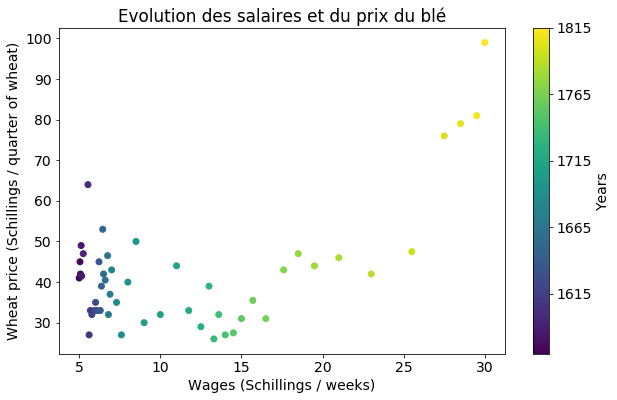

In [162]:
figure(num=None, figsize=(10, 6))
plt.rcParams.update({'font.size': 14})

# Pouvoir d'achat par année
plt.scatter(data.Wages, data.Wheat, c=data.Ind)

cb = plt.colorbar()
cb.set_label('Years')

Ind_tick = [item.get_text() for item in cb.ax.get_yticklabels(which='both')]
Ind_tick = [int(numeric_string) for numeric_string in Ind_tick]

cb.ax.set_yticklabels(list(map(str,data.Year[Ind_tick])))

plt.title('Evolution des salaires et du prix du blé')
plt.xlabel('Wages (Schillings / weeks)')
plt.ylabel('Wheat price (Schillings / quarter of wheat)')
plt.tight_layout
plt.show()

En unités SI et par années

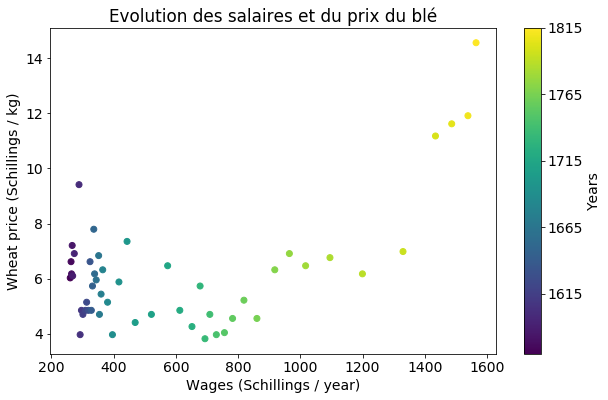

In [165]:
figure(num=None, figsize=(10, 6))
plt.rcParams.update({'font.size': 14})

# Pouvoir d'achat par année
plt.scatter(data.Wages_y, data.Wheat_kg, c=data.Ind)

cb = plt.colorbar()
cb.set_label('Years')

Ind_tick = [item.get_text() for item in cb.ax.get_yticklabels(which='both')]
Ind_tick = [int(numeric_string) for numeric_string in Ind_tick]

cb.ax.set_yticklabels(list(map(str,data.Year[Ind_tick])))

plt.title('Evolution des salaires et du prix du blé')
plt.xlabel('Wages (Schillings / year)')
plt.ylabel('Wheat price (Schillings / kg)')
plt.tight_layout
plt.show()